<a href="https://colab.research.google.com/github/hucarlos08/GEO-ML/blob/main/Lessons/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Linear Regression

Linear regression is a widely used method for predicting a real-valued output (also known as the dependent variable or target) $y \in \mathbb{R}$, given a vector of real-valued inputs (also known as independent variables, explanatory variables, or covariates) $\mathbf x \in \mathbb{R}^D$.

The key property of the linear regression model is that the expected value of the output is assumed to be a linear function of the input:

$$
E[y|x] = \mathbf w^T \mathbf x,
$$

where $\mathbf w$ is the vector of weights or coefficients.

This assumption makes the model easy to interpret and easy to fit to data. Linear regression can be extended to handle nonlinear relationships by applying nonlinear transformations to the input features, which will be discussed later.

## Least Squares Linear Regression
The most common form of the linear regression model can be described by the following probability distribution:

$$
p(y|\mathbf x, \theta) = \mathscr{N}(y|w_0 + \mathbf w^T \mathbf x, \sigma^2),
$$

where $\theta = (w_0, \mathbf w, \sigma^2)$ are the parameters of the model. Here, $w_0$ is the bias term, $\mathbf w$ are the weights, and $\sigma^2$ is the variance of the Gaussian noise.

### Simple vs. Multiple Linear Regression
If the input is one-dimensional ($D = 1$), the model has the form:

$$
f(x; w) = ax + b,
$$
where $b = w_0$ is the intercept and $a = w_1$ is the slope. This is called **simple linear regression**.

If the input is multi-dimensional ($x \in \mathbb{R}^D$ where $D > 1$), the method is called **multiple linear regression**. The general model equation becomes:

$$
y = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D + \epsilon,
$$

where $\epsilon$ represents the Gaussian noise with mean zero and variance $\sigma^2$.

### Multivariate Linear Regression

If the output is also multi-dimensional ($\mathbf y \in \mathbb{R}^J$ where $J > 1$), the method is called **multivariate linear regression**. The model equation becomes:

$$
p(\mathbf y|\mathbf x, W) = \prod_{j=1}^{J} \mathscr{N}(y_j | \mathbf w_j^T x, \sigma_j^2),
$$

where $W$ is a matrix of weights, and each $y_j$ is predicted by a separate linear model.

### Nonlinear Transformations
In many cases, a straight line will not provide a good fit to the data. However, we can apply a nonlinear transformation to the input features by replacing $x$ with $\phi(x)$ to obtain:

$$
p(y|\mathbf x, \theta) = \mathscr{N}(y|\mathbf w^T \phi(x), \sigma^2).
$$

As long as the parameters of the feature extractor $\phi$ are fixed, the model remains linear in the parameters, even if it is not linear in the inputs.

For example, in polynomial regression, if the input is one-dimensional and we use a polynomial expansion of degree $d$, we get $\phi(\mathbf x) = [1, x, x^2, \ldots, x^d]$.

Linear regression provides a foundation for many complex models and is a crucial tool in the data scientist's toolkit. In the following sections, we will delve into the mathematical details of fitting linear regression models, measuring their performance, and extending them to handle more complex data patterns.


## Least Squares Linear Regression

The most common form of the linear regression model can be described by the following probability distribution:

$$
p(y|\mathbf x, \theta) = \mathscr{N}(y|w_0 + \mathbf w^T \mathbf x, \sigma^2),
$$
where $\theta = (w_0, \mathbf w, \sigma^2) $ are the parameters of the model. Here, $w_0 $ is the bias term, $\mathbf w $ are the weights, and $\sigma^2 $ is the variance of the Gaussian noise.

### Terminology

- **Weights/Regression Coefficients** ($\mathbf w$): Each coefficient $w_d $ specifies the change in the output we expect if we change the corresponding input feature $x_d $ by one unit.
- **Bias Term** ($w_0 $): The offset or baseline value of the output when all input features are zero.

### Least Squares Estimation

To fit a linear regression model to data, we minimize the negative log-likelihood (NLL) on the training set. The objective function is given by:

$$
\text{NLL}(\mathbf w, \sigma^2) = -\sum_{n=1}^{N} \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -\frac{(y_n - \mathbf w^T \mathbf x_n)^2}{2\sigma^2} \right) \right).
$$

Simplifying, we get:

$$
\text{NLL}(w, \sigma^2) = \frac{1}{2\sigma^2} \sum_{n=1}^{N} (y_n - \hat{y}_n)^2 + \frac{N}{2} \log(2\pi\sigma^2),
$$

where $\hat{y}_n = \mathbf w^T \mathbf x_n $.

### Ordinary Least Squares (OLS)

The goal is to minimize the residual sum of squares (RSS):

$$
\text{RSS}(w) = \sum_{n=1}^{N} (y_n - w^T x_n)^2.
$$.

The solution to these equations is the ordinary least squares (OLS) estimate:

$$
\hat{\mathbf w} = (X^T X)^{-1} X^T \mathbf y.
$$

### Geometric Interpretation

The normal equations can be interpreted geometrically. The OLS solution projects the target vector $y $ onto the column space of the input matrix $X$. This is equivalent to finding the point in the column space of $X $ that is closest to $y $.

The projection matrix is given by:

$$
\text{Proj}(X) = X (X^T X)^{-1} X^T,
$$

and the predicted values are:

$$
\hat{y} = \text{Proj}(X) \mathbf y = X (X^T X)^{-1} X^T \mathbf y.
$$

In the next sections, we will discuss algorithmic issues, methods to ensure numerical stability when solving the normal equations, and extensions to handle weighted least squares and other variations.


## Non linear transformations

### Basis Functions for $x\in\mathbb{R}$

Basis functions are a set of functions used to transform the input data into a higher-dimensional space. In regression analysis, basis functions allow us to model more complex relationships between the input variables and the output by using a linear combination of these transformed features.

Given an input $x$, a set of basis functions $\{\phi_0(x), \phi_1(x), \ldots, \phi_D(x)\}$ transforms $x$ into a higher-dimensional feature vector $\Phi(x)$:

$$
\Phi(x) = \begin{bmatrix}
\phi_0(x) \\
\phi_1(x) \\
\vdots \\
\phi_D(x)
\end{bmatrix}.
$$

The choice of basis functions determines the nature of the transformation. Common types of basis functions include polynomial and radial basis functions.

#### Polynomial Basis Functions
Polynomial basis functions are powers of the input variable. For a given degree $D$, the polynomial basis functions are defined as:

$$
\phi_j(x) = x^j, \quad \text{for} \quad j = 0, 1, 2, \ldots, D.
$$

Using polynomial basis functions, the feature vector becomes:

$$
\Phi(x) = \begin{bmatrix}
1 \\
x \\
x^2 \\
\vdots \\
x^D
\end{bmatrix}.
$$

#### Radial Basis Functions
Radial basis functions (RBF) depend on the distance from a center point. A common choice is the Gaussian radial basis function, defined as:

$$
\phi_j(x) = \exp\left(-\frac{(x - \mu_j)^2}{2s_j^2}\right),
$$

where $\mu_j$ is the center and $s_j$ is the width (spread) of the Gaussian.

Using Gaussian RBFs, the feature vector becomes:

$$
\Phi(x) = \begin{bmatrix}
\exp\left(-\frac{(x - \mu_1)^2}{2s_1^2}\right) \\
\exp\left(-\frac{(x - \mu_2)^2}{2s_2^2}\right) \\
\vdots \\
\exp\left(-\frac{(x - \mu_D)^2}{2s_D^2}\right)
\end{bmatrix}.
$$

## Ordinary Least Squares (OLS) Solution

In linear regression, we seek to find the coefficients $\mathbf{w}$ that minimize the residual sum of squares between the observed outputs and the predicted outputs. The predicted output is modeled as a linear combination of the basis functions:

$$
\hat{y} = \mathbf{w}^T \Phi(x).
$$

The least squares solution to this problem is given by:

$$
\mathbf{w}^* = (\Phi^T \Phi)^{-1} \Phi^T \mathbf{y},
$$

where:
- $\mathbf{y}$ is the vector of observed outputs:

$$
\mathbf{y} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_M \end{bmatrix},
$$

- $\Phi$ is the design matrix, constructed using the basis functions evaluated at each data point:

$$
\Phi = \begin{bmatrix}
\phi_0(x_1) & \phi_1(x_1) & \phi_2(x_1) & \dots & \phi_D(x_1) \\
\phi_0(x_2) & \phi_1(x_2) & \phi_2(x_2) & \dots & \phi_D(x_2) \\
\vdots & \vdots & \vdots & \dots & \vdots \\
\phi_0(x_M) & \phi_1(x_M) & \phi_2(x_M) & \dots & \phi_D(x_M) \\
\end{bmatrix}.
$$

## Conclusion
By choosing appropriate basis functions, we can transform the input data into a space where linear regression can capture more complex relationships. Polynomial and radial basis functions are two powerful tools for this purpose, each with its strengths and applications.

#### Be carreful

Condition Number: None
RMS Error: 0.13208207638282643


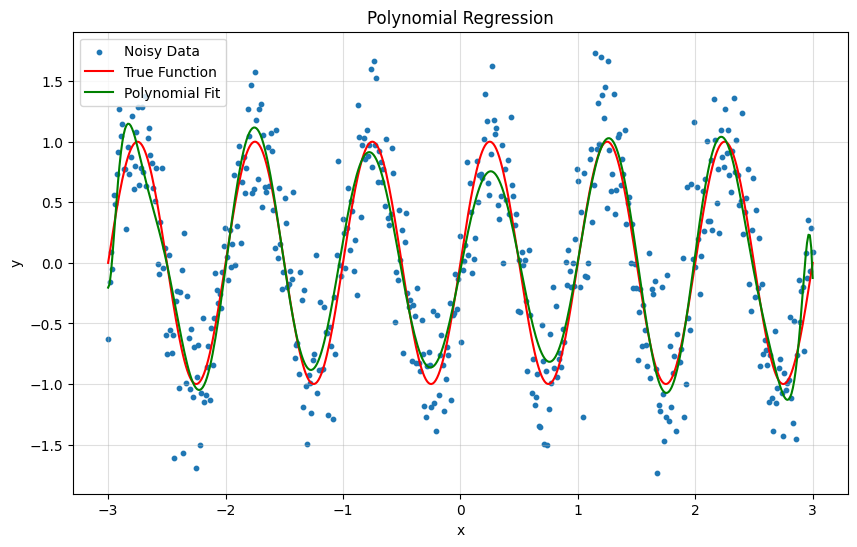

In [11]:
import jax
import jax.numpy as jnp
from jax import random, vmap
import matplotlib.pyplot as plt
from typing import Tuple

jax.config.update('jax_enable_x64', True)

# Basis function for polynomial terms
def polynomial_basis_function(x: jnp.ndarray, degree: int) -> jnp.ndarray:
    """Compute the polynomial basis function for a given degree.

    Args:
        x (jnp.ndarray): Input data points.
        degree (int): Degree of the polynomial basis function.

    Returns:
        jnp.ndarray: Polynomial basis function evaluated at x.
    """
    return x**degree

def solve_ols(design_matrix: jnp.ndarray, observations: jnp.ndarray) -> Tuple[jnp.ndarray, float]:
    """Solve the ordinary least squares (OLS) problem using matrix inversion.

    Args:
        design_matrix (jnp.ndarray): Design matrix containing basis functions.
        observations (jnp.ndarray): Observed data points.

    Returns:
        Tuple[jnp.ndarray, float]: Coefficients of the polynomial and the condition number of the product matrix.
    """
    design_matrix_transpose = design_matrix.T
    product_matrix = jnp.dot(design_matrix_transpose, design_matrix)
    inverse_matrix = jnp.linalg.inv(product_matrix)
    phi_times_y = jnp.dot(design_matrix_transpose, observations)
    coefficients = jnp.dot(inverse_matrix, phi_times_y)
    condition_number = jnp.linalg.cond(product_matrix)
    return coefficients, condition_number

def stable_solve_ols(design_matrix: jnp.ndarray, observations: jnp.ndarray) -> Tuple[jnp.ndarray, None]:
    """Solve the ordinary least squares (OLS) problem using a more stable approach.

    Args:
        design_matrix (jnp.ndarray): Design matrix containing basis functions.
        observations (jnp.ndarray): Observed data points.

    Returns:
        Tuple[jnp.ndarray, None]: Coefficients of the polynomial and None for compatibility.
    """
    design_matrix_transpose = design_matrix.T
    product_matrix = jnp.dot(design_matrix_transpose, design_matrix)
    phi_times_y = jnp.dot(design_matrix_transpose, observations)
    coefficients = jnp.linalg.solve(product_matrix, phi_times_y)
    return coefficients, None

# Create the data
num_points = 500
angular_frequency = 2 * jnp.pi
x_values = jnp.linspace(-3.0, 3.0, num=num_points)
true_y_values = jnp.sin(angular_frequency * x_values)

# Noisy data
key = random.PRNGKey(0)
noise_mean, noise_std_dev = 0, 0.4
noisy_y_values = true_y_values + random.normal(key, (num_points,)) * noise_std_dev

num_basis_functions = 20

# Vectorized computation of the design matrix
vectorized_basis_function = vmap(lambda degree: polynomial_basis_function(x_values, degree), (0,))
design_matrix = vectorized_basis_function(jnp.arange(num_basis_functions)).T

# Solve using the OLS methods
coefficients, condition_number = stable_solve_ols(design_matrix, noisy_y_values)
print(f"Condition Number: {condition_number}")


# Estimate the function using the coefficients
estimated_y_values = jnp.dot(design_matrix, coefficients)

# Calculate and print RMS error
rms_error = jnp.sqrt((1.0 / num_points) * jnp.linalg.norm(estimated_y_values - noisy_y_values))
print(f"RMS Error: {rms_error}")

# Create the matplotlib visualization
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(x_values, noisy_y_values, s=10, label="Noisy Data")  # Smaller marker size for better visualization
plt.plot(x_values, true_y_values, color="red", label="True Function")
plt.plot(x_values, estimated_y_values, color="green", label="Polynomial Fit")

plt.title("Polynomial Regression")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.show()


### Basis Functions for Multivariate Inputs $\mathbf{x}\in\mathbb{R}^n$

When dealing with multivariate inputs $\mathbf{x} \in \mathbb{R}^n$, the basis functions need to be adapted to take into account all the components of $\mathbf{x}$. This allows the model to capture interactions between different features.

#### Polynomial Basis Functions
For a multivariate input $\mathbf{x} = [x_1, x_2, \ldots, x_n]$, polynomial basis functions can be defined to include not just individual powers of each feature, but also interaction terms. For example, for a polynomial of degree 2, the basis functions could include:

$$
\phi(\mathbf{x}) = [1, x_1, x_2, \ldots, x_n, x_1^2, x_2^2, \ldots, x_n^2, x_1 x_2, x_1 x_3, \ldots, x_{n-1} x_n]
$$

In general, for a polynomial of degree $D$, the basis functions can be represented as:
$$
\phi_j(\mathbf{x}) = \prod_{k=1}^n x_k^{d_k},
$$
where $ \sum_{k=1}^n d_k \leq D $ and $ d_k \geq 0 $ are the degrees of the polynomial terms for each feature.

#### Radial Basis Functions
Radial basis functions (RBF) for multivariate inputs typically depend on the distance from a center point in the multivariate space. A common choice is the multivariate Gaussian RBF, defined as:

$$
\phi_j(\mathbf{x}) = \exp\left(-\frac{\|\mathbf{x} - \boldsymbol{\mu}_j\|^2}{2s_j^2}\right),
$$
where $\boldsymbol{\mu}_j \in \mathbb{R}^n$ is the center of the $j$-th basis function, and $s_j$ is the width (spread) of the Gaussian.

### Design Matrix for Multivariate Inputs
The design matrix $\Phi$ for multivariate inputs is constructed similarly to the univariate case, but using the multivariate basis functions evaluated at each data point $\mathbf{x}_i $:

$$
\Phi = \begin{bmatrix}
\phi_0(\mathbf{x}_1) & \phi_1(\mathbf{x}_1) & \phi_2(\mathbf{x}_1) & \dots & \phi_D(\mathbf{x}_1) \\
\phi_0(\mathbf{x}_2) & \phi_1(\mathbf{x}_2) & \phi_2(\mathbf{x}_2) & \dots & \phi_D(\mathbf{x}_2) \\
\vdots & \vdots & \vdots & \dots & \vdots \\
\phi_0(\mathbf{x}_M) & \phi_1(\mathbf{x}_M) & \phi_2(\mathbf{x}_M) & \dots & \phi_D(\mathbf{x}_M) \\
\end{bmatrix}.
$$

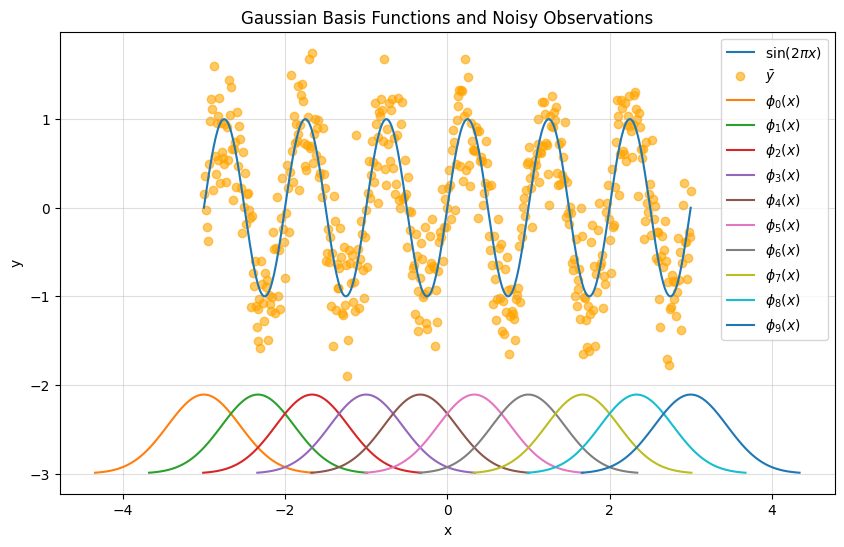

In [5]:
import jax.numpy as jnp
from jax import random
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
s = 0.2
D = 10  # The number of basis functions
mus     = jnp.linspace(-3, 3, D)
sigmas  = s * jnp.ones((D, 1))
n_s     = 100

# Function to simulate Gaussian basis functions
def simGauss(mu, sig, n_s):
    sigma = jnp.sqrt(sig)
    x = jnp.linspace(mu - 3 * sigma, mu + 3 * sigma, n_s)
    y = norm.pdf(x, mu, sigma)  # Using scipy.stats for PDF
    return x, y

# Plotting with matplotlib
plt.figure(figsize=(10, 6), dpi=100)

# True function
plt.plot(x_values, true_y_values, label=r"$\sin(2\pi x)$")

# Noisy observations
plt.scatter(x_values, noisy_y_values, label=r"$\bar y$", color='orange', alpha=0.6)

# Gaussian basis functions
for i in range(D):
    namep = r"$\phi_{" + str(i) + "}(x)$"
    xg, yg = simGauss(mus[i], sigmas[i], n_s)
    plt.plot(xg, yg - 3, label=namep)  # Shifted for visualization

plt.title("Gaussian Basis Functions and Noisy Observations")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.show()


Condition Number: 25.565357522904986
RMS Error: 0.13011973315592676


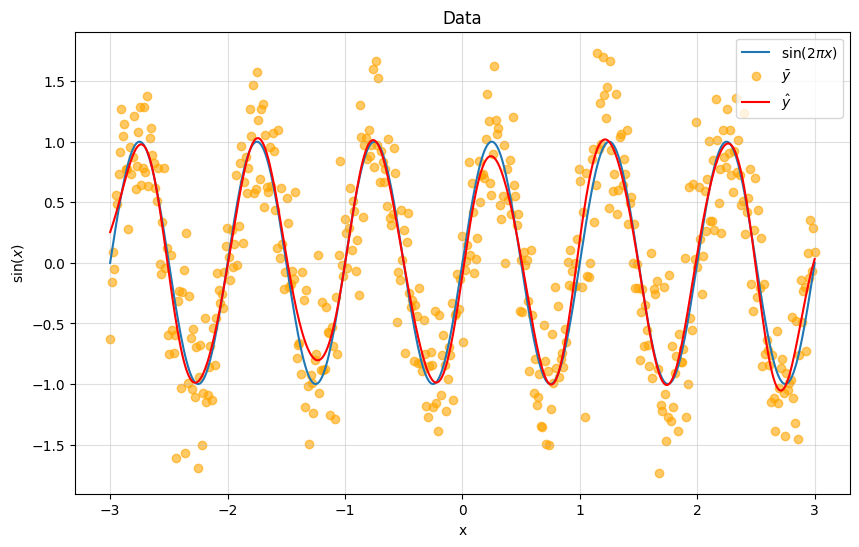

In [13]:
import jax.numpy as jnp
from jax import random
from jax import random, vmap

import matplotlib.pyplot as plt

# Parameters
sigma = 0.2
num_basis_functions = 20  # The number of basis functions

# Mean and standard deviation for the Gaussian basis functions
means     = jnp.linspace(-3, 3, num_basis_functions)
std_devs  = sigma * jnp.ones((num_basis_functions,))

# Define the Gaussian basis function
def gaussian_basis_function(x, mean, std_dev):
    return jnp.exp(-((x - mean) ** 2) / (2 * (std_dev ** 2)))

# Be careful how you implement
#design_matrix = jnp.array([[gaussian_basis_function(x_values[i], means[j], std_devs[j]) for j in range(num_basis_functions)] for i in range(num_points)])

# Vectorized computation of the design matrix
vectorized_gaussian = vmap(lambda mean, std_dev: gaussian_basis_function(x_values, mean, std_dev), (0, 0))
design_matrix       = vectorized_gaussian(means, std_devs).T

# Solve using the OLS methods
coefficients, condition_number = solve_ols(design_matrix, noisy_y_values)
print(f"Condition Number: {condition_number}")

# Estimate the function using the computed weights
estimated_y_values = jnp.matmul(design_matrix, coefficients)
rms_error = jnp.sqrt((1.0 / num_points) * jnp.linalg.norm(estimated_y_values - noisy_y_values))
print(f"RMS Error: {rms_error}")

# Plot the values
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(x_values, true_y_values, label=r"$\sin(2\pi x)$")
plt.scatter(x_values, noisy_y_values, label=r"$\bar y$", color='orange', alpha=0.6)
plt.plot(x_values, estimated_y_values, label=r"$\hat{y}$", color='red')

plt.title("Data")
plt.xlabel("x")
plt.ylabel(r"$\sin(x)$")
plt.legend()
plt.grid(alpha=0.4)  # Add a subtle grid
plt.show()
